# Alaska history

### Import Python tools and Jupyter configuration

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import datetime as dt
import numpy as np
import altair as alt
import altair_stiles as altstiles
import requests
from bs4 import BeautifulSoup

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [50]:
today = dt.date.today().strftime("%Y-%m-%d")

In [53]:
days = pd.to_datetime(today).dayofyear

In [46]:
import datetime as dt
import calendar

date = dt.datetime.strptime(today, "%Y-%m-%d")
year = date.year
days = 366 if calendar.isleap(year) else 365

In [47]:
days

365

---

In [6]:
# history_gdf = gpd.read_file(
#     "/Users/stiles/data/gis/wildfires/alaska/AlaskaFireHistoryPerimeters_NWCG_AICC_1940_2021/AlaskaFireHistoryPerimeters_NWCG_AICC.gdb/"
# )

In [7]:
history_gdf = gpd.read_file(
    "/Users/stiles/data/gis/wildfires/alaska/Yukon-Kuskokwim_fires_history_justwithin.geojson"
)

In [8]:
history_current = gpd.read_file(
    "/Users/stiles/data/gis/wildfires/alaska/Yukon-Kuskokwim_fires_current_acres.geojson"
)

In [9]:
len(history_gdf)

188

<AxesSubplot:>

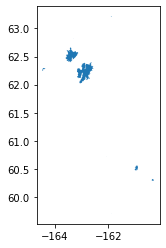

In [10]:
history_current.plot()

In [11]:
history_gdf[
    [
        "OBJECTID",
        "AICC_FIREID",
        "FireYear",
        "LocalIncidentIdentifier",
        "IncidentName",
        "GISAcres",
        "FireOccurID",
        "UniqueFireIdentifier",
        "POOOwnerUnit",
        "POOResponsibleUnit",
        "POOFireMgmtOption",
        "MapMethod",
        "PerimeterDateTime",
        "PerimeterLastUpdated",
        "FireComments",
        "DiscoveryDate",
        "OutDate_1",
        "MergedDate_1",
        "MergedWithFire",
        "IsPrescribedFire",
        "POOCoordLong",
        "POOCoordLat",
        "GACC",
        "ORIG_FID",
        "Shape_Length",
        "Shape_Area",
    ]
].head()

,OBJECTID,AICC_FIREID,FireYear,LocalIncidentIdentifier,IncidentName,GISAcres,FireOccurID,UniqueFireIdentifier,POOOwnerUnit,POOResponsibleUnit,POOFireMgmtOption,MapMethod,PerimeterDateTime,PerimeterLastUpdated,FireComments,DiscoveryDate,OutDate_1,MergedDate_1,MergedWithFire,IsPrescribedFire,POOCoordLong,POOCoordLat,GACC,ORIG_FID,Shape_Length,Shape_Area
0,63,68034,2021,000236,Spring Water,5.552873,{7A657230-1279-44C8-9174-2BDB938EE294},2021-AKGAD-000236,"ANCSA-AKVLN-Azachorok, Incorporated",AKGAD,Full,Mixed Methods,2021-06-21 14:00:00,2021-06-29 14:08:00,Sentinel 2 image and detection photo,2021-06-18 19:56:00,2021-06-28 18:38:00,NaT,None,N,-163.755389,62.089139,AICC,63,784.038306,2.247168e+04
1,116,67891,2021,000102,Kongishluk Bay,3033.284985,{0993B931-6F76-43E5-8102-CF49DF01E606},2021-AKSWS-000102,ANCSA-AKVLN-Askinuk Corporation,AKSWS,Full,Image Interpretation,2021-06-01 14:28:00,2021-06-03 08:23:00,Perimeter digitzed using Sentinel-2 imagery.,2021-05-24 10:54:24,2021-07-02 12:06:29,NaT,None,N,-165.766383,61.809350,AICC,116,29947.453226,1.227527e+07
2,113,67901,2021,000112,Kiktak Island,254.215186,{26299BAD-A4B3-441B-AD2E-109FE8D582A1},2021-AKSWS-000112,BIA-AKAKA-Native Allotments,AKSWS,Full,Image Interpretation,2021-05-26 12:59:59,2021-05-27 08:29:59,Perimeter digitized using Planet Imagery.,2021-05-25 10:41:53,2021-07-02 12:07:18,NaT,None,N,-161.425250,60.888611,AICC,113,6952.517984,1.028773e+06
3,142,66840,2020,000347,Kgun Lake,1523.284466,{38D60820-0B14-4D78-85E7-6B7FE8CD6847},2020-AKSWS-000347,USFWS-AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,Limited,Image Interpretation,2020-08-02 14:00:00,2020-08-04 11:00:59,Perimeter updated by AFS (D. Griggs) using Sentinel-2 imagery.,2020-07-14 14:09:40,2020-08-07 13:28:21,NaT,None,N,-163.537861,61.523944,AICC,142,16683.818002,6.164514e+06
4,260,63943,2020,000116,Ingakslugwat Hills,54099.103837,{86E9E21E-D3E9-462B-BD6D-7D846AE0D570},2020-AKSWS-000116,USFWS-AKYDR-Yukon Delta National Wildlife Refuge,AKSWS,Limited,Image Interpretation,2020-07-13 14:00:00,2020-07-15 08:03:00,Perimeter updated by DOF-MSS (Snyder) using Sentinel-2 image; overlap with 154 removed by AFS GIS.,2020-05-30 17:49:21,2020-07-15 16:39:58,NaT,None,N,-164.031667,61.365500,AICC,260,272860.540295,2.189314e+08


In [12]:
history_gdf["POOResponsibleUnit"].value_counts()

AKSWS    85
AKGAD    66
AKMCG    26
AKGAL     6
AKSWA     2
AKXXX     1
AKIV      1
AKHOL     1
Name: POOResponsibleUnit, dtype: int64

In [13]:
history_gdf["decade"] = history_gdf["FireYear"].astype(str).str[:3] + "0s"

In [58]:
years = history_gdf.groupby(["FireYear"]).agg({"GISAcres": sum}).round(2).reset_index()

In [59]:
years["acres_per_day"] = years["GISAcres"] / 365

In [60]:
current = pd.DataFrame(
    {
        "FireYear": "2022",
        "GISAcres": history_current.acres.sum(),
        "acres_per_day": (history_current.acres.sum() / days),
    },
    index=[42],
)

In [61]:
nu_years = pd.concat([years, current])

In [71]:
nu_years["acres_per_day"].mean() * 20

1530.0320629472435

In [62]:
nu_years.to_csv("yukon-kuskokwim_delta.csv", index=False)

In [73]:
alt.Chart(nu_years).mark_bar().encode(x="FireYear:O", y="acres_per_day")

alt.Chart(...)